# < 다양한 OCR모델로 그림일기를 읽고 비교하기 >

**- 목차 -**

□ Step1 검증용 데이터셋 준비    
□ Step2 Google OCR로 테스트 진행   
□ Step3 keras-ocr로 테스트 진행   
□ Step4 Tesseract로 테스트 진행   
□ Step5 테스트 결과 정리   
□ Step6 결과 분석과 결론 제시   
□ 정리 및 회고

### ■ Step1 검증용 데이터셋 준비

**1-1 데이터셋 폴더 경로 설정 및 데이터 확인**

In [41]:
import os

img_dir = os.getenv('HOME')+'/aiffel/ocr_python/english_diary'
english_diary = os.listdir(img_dir)
english_diary

['english_diary1.png',
 '.ipynb_checkpoints',
 'english_diary3.png',
 'english_diary2.png']

### ■ Step2 Google OCR로 테스트 진행

**2-1 Google OCR API 작동 함수 정의**

In [42]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

**2-2 인증키 및 입력 이미지 경로 지정**

In [51]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/plenary-plane-333901-4a011ec44244.json'

# 입력 이미지 경로를 지정해 주세요.
path1 = os.getenv('HOME')+'/aiffel/ocr_python/english_diary/english_diary1.png'
path2 = os.getenv('HOME')+'/aiffel/ocr_python/english_diary/english_diary2.png'
path3 = os.getenv('HOME')+'/aiffel/ocr_python/english_diary/english_diary3.png'

-rw-r--r-- 1 root root 2331 Dec  2 04:41 /aiffel/aiffel/ocr_python/plenary-plane-333901-4a011ec44244.json


**2-3 OCR 작동**

In [52]:
detect_text(path1)

Texts:

"Wednesdaygudane 3,2015 | 16
TiHe Bunny and rabit
Date
tyler
kailey
Sara
Emma
Coco
I saw a nabbit. Rabbit and
pd suny
live in the den. There are 7 bunny My
fawaunik bunny ore Ermma and Keiley.
Because Kailey is cute and Emma is
pretty Rabbit like cloxer and a
Loarrota
"

"Wednesdaygudane"

"3,2015"

"|"

"16"

"TiHe"

"Bunny"

"and"

"rabit"

"Date"

"tyler"

"kailey"

"Sara"

"Emma"

"Coco"

"I"

"saw"

"a"

"nabbit."

"Rabbit"

"and"

"pd"

"suny"

"live"

"in"

"the"

"den."

"There"

"are"

"7"

"bunny"

"My"

"fawaunik"

"bunny"

"ore"

"Ermma"

"and"

"Keiley."

"Because"

"Kailey"

"is"

"cute"

"and"

"Emma"

"is"

"pretty"

"Rabbit"

"like"

"cloxer"

"and"

"a"

"Loarrota"
bounds: (3,750),(110,750),(110,774),(3,774)


In [53]:
detect_text(path2)

Texts:

"Weinesdaylay 6, 2015
Rapuczél
6.
Date
Age
Title
I saw a movie about Rapunzel, She
drows eyeryuhere Rapuazals ang hair
gets people better, Rapunzel is one of
my fayourite Disney Pricecesses,Rapuna
petis Pascal Pascal changes his coloue
Lall the time. Po voulik Rapuzel,
"

"Weinesdaylay"

"6,"

"2015"

"Rapuczél"

"6."

"Date"

"Age"

"Title"

"I"

"saw"

"a"

"movie"

"about"

"Rapunzel,"

"She"

"drows"

"eyeryuhere"

"Rapuazals"

"ang"

"hair"

"gets"

"people"

"better,"

"Rapunzel"

"is"

"one"

"of"

"my"

"fayourite"

"Disney"

"Pricecesses,Rapuna"

"petis"

"Pascal"

"Pascal"

"changes"

"his"

"coloue"

"Lall"

"the"

"time."

"Po"

"voulik"

"Rapuzel,"
bounds: (378,742),(503,742),(503,789),(378,789)


In [54]:
detect_text(path3)

Texts:

"Date
Monday, July 27,2015 ape 6
IStamps
Title
30
I love stamps, because they have
cool picture on it, There is a lot of V
Kinds of stamps around The work. ♡
You put stampon eo
CO
You
peopes.
can aollect stamp
e
"

"Date"

"Monday,"

"July"

"27,2015"

"ape"

"6"

"IStamps"

"Title"

"30"

"I"

"love"

"stamps,"

"because"

"they"

"have"

"cool"

"picture"

"on"

"it,"

"There"

"is"

"a"

"lot"

"of"

"V"

"Kinds"

"of"

"stamps"

"around"

"The"

"work."

"♡"

"You"

"put"

"stampon"

"eo"

"CO"

"You"

"peopes."

"can"

"aollect"

"stamp"

"e"
bounds: (350,703),(366,704),(363,753),(347,752)


### ■ Step3 keras_ocr로 테스트 진행

**3-1 keras_ocr 모델 준비**

In [7]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


**3-2 이미지 인식하기**

In [55]:
image1 = keras_ocr.tools.read(path1)
prediction_groups1 = pipeline.recognize([path1])

image2 = keras_ocr.tools.read(path2)
prediction_groups2 = pipeline.recognize([path2])

image3 = keras_ocr.tools.read(path3)
prediction_groups3 = pipeline.recognize([path3])

**3-3 인식 결과 시각화**

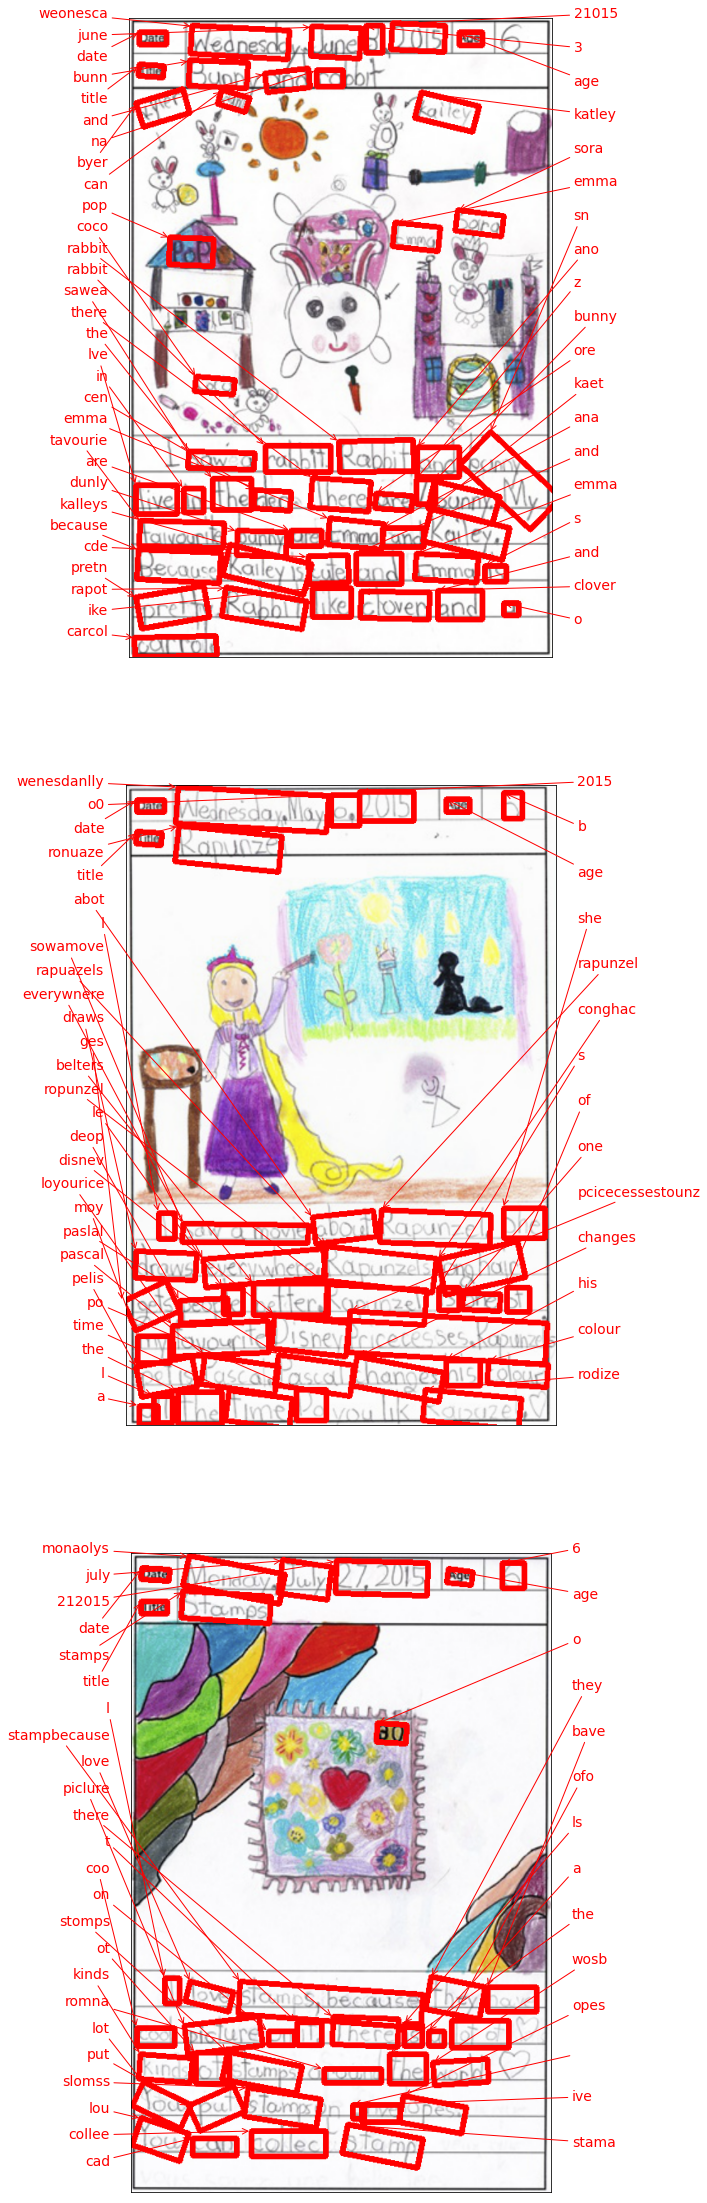

In [56]:
f, ax = plt.subplots(nrows=3, figsize=(20, 40))
keras_ocr.tools.drawAnnotations(image=image1, 
                                predictions=prediction_groups1[0], ax=ax[0])
keras_ocr.tools.drawAnnotations(image=image2,
                                predictions=prediction_groups2[0], ax=ax[1])
keras_ocr.tools.drawAnnotations(image=image3,
                                predictions=prediction_groups3[0], ax=ax[2])
plt.show()

### ■ Step4 Tesseract로 테스트 진행

**4-1 테서랙트 설치**

In [21]:
! sudo apt install tesseract-ocr
! sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


**4-2 테서랙트 파이썬 wrapper 설치**

In [22]:
! pip install pytesseract

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


**4-3 테서랙트로 문자 검출하고 이미지 자르기 (detection) 함수 정의**

In [57]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

**4-4 폴더 및 파일 경로 설정**

In [60]:
work_dir1 = os.getenv('HOME')+'/aiffel/ocr_python/english_diary/english_diary1'
work_dir2 = os.getenv('HOME')+'/aiffel/ocr_python/english_diary/english_diary2'
work_dir3 = os.getenv('HOME')+'/aiffel/ocr_python/english_diary/english_diary3'

img_file_path1 = work_dir1 + '/english_diary1.png'
img_file_path2 = work_dir2 + '/english_diary2.png'
img_file_path3 = work_dir3 + '/english_diary3.png'


**4-5 테서랙트로 문자 영역 이미지 자르기**

In [61]:
cropped_image_path_list1 = crop_word_regions(img_file_path1, work_dir1)

/aiffel/aiffel/ocr_python/english_diary/english_diary1/0000.png
/aiffel/aiffel/ocr_python/english_diary/english_diary1/0001.png
/aiffel/aiffel/ocr_python/english_diary/english_diary1/0002.png
/aiffel/aiffel/ocr_python/english_diary/english_diary1/0003.png


In [63]:
cropped_image_path_list2 = crop_word_regions(img_file_path2, work_dir2)

/aiffel/aiffel/ocr_python/english_diary/english_diary2/0000.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0001.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0002.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0003.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0004.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0005.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0006.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0007.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0008.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0009.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0010.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0011.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0012.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0013.png
/aiffel/aiffel/ocr_python/english_diary/english_diary2/0014.png
/aiffel/aiffel/ocr_python/english_diary/

In [64]:
cropped_image_path_list3 = crop_word_regions(img_file_path1, work_dir3)

/aiffel/aiffel/ocr_python/english_diary/english_diary3/0000.png
/aiffel/aiffel/ocr_python/english_diary/english_diary3/0001.png
/aiffel/aiffel/ocr_python/english_diary/english_diary3/0002.png
/aiffel/aiffel/ocr_python/english_diary/english_diary3/0003.png


**4-6 테서랙트로 잘린 이미지에서 단어 인식 함수 정의**

In [65]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

**4-7 테서랙트로 잘린 이미지에서 단어 인식 하기**

In [66]:
recognize_images(cropped_image_path_list1)

errr i lll cr cl ee mm lt mm ell ell A I I eT TT TG TTT CT TTT LE cu

Ne oO Oooo OOO oO OOOO Eo Eo EO EE EEO

EO EO ee OL EO eee rrmrmlhl eee TrmrmrmrmlrllhlLlLlmh | | |lh— —_—- ——  — ~~ i °° . -_ -- °° ° °° ° °° °° °° °° °° °° °° ° °° °°  ~'—__—_—_——_


Done


In [69]:
recognize_images(cropped_image_path_list2)

‘met

POV ic

AVO UE

‘b,

EVETV WNers

Ro

iT Lei)

LY)

No


we IE

better,


ae

Ss

ore

of

wy

oui

isney

Smit

apa


i

USC Gis

ASC.ch |

OQ

ath.

‘olour

{

+

“EG

a

-


i

Done


In [68]:
recognize_images(cropped_image_path_list3)

errr i lll cr cl ee mm lt mm ell ell A I I eT TT TG TTT CT TTT LE cu

Ne oO Oooo OOO oO OOOO Eo Eo EO EE EEO

EO EO ee OL EO eee rrmrmlhl eee TrmrmrmrmlrllhlLlLlmh | | |lh— —_—- ——  — ~~ i °° . -_ -- °° ° °° ° °° °° °° °° °° °° °° ° °° °°  ~'—__—_—_——_


Done


### ■ Step5 테스트 결과 정리

- **첫번째 그림 일기**

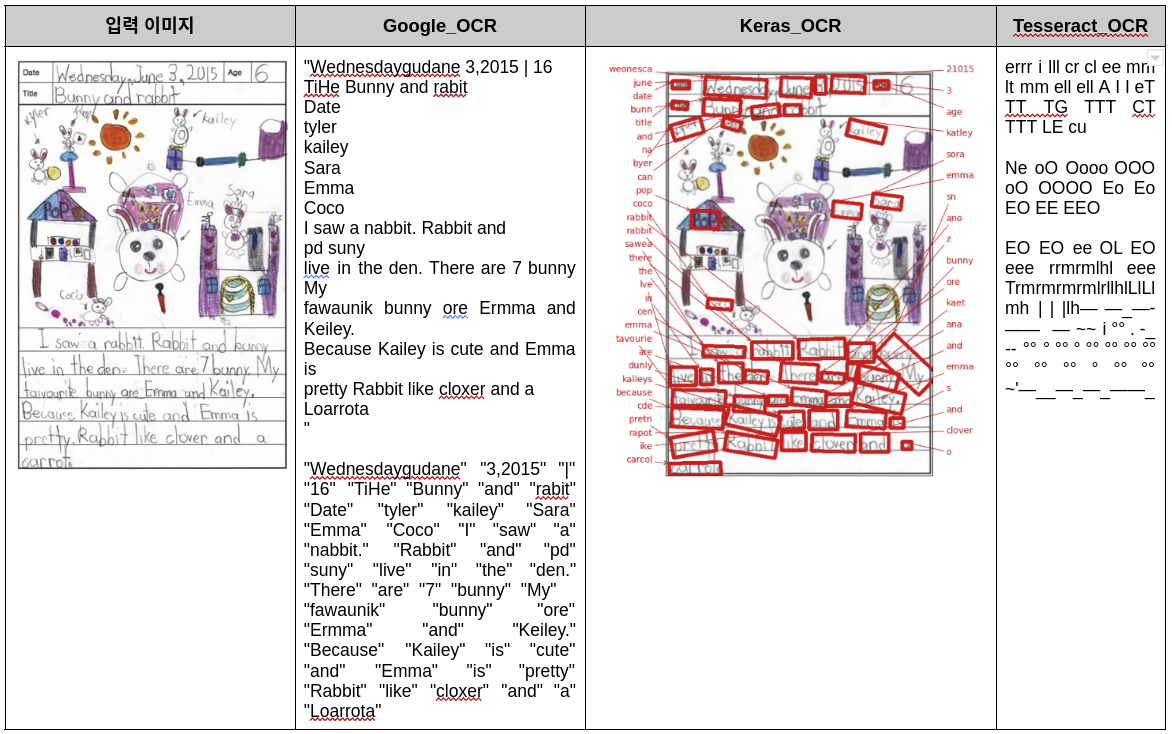

- **두번째 그림 일기**

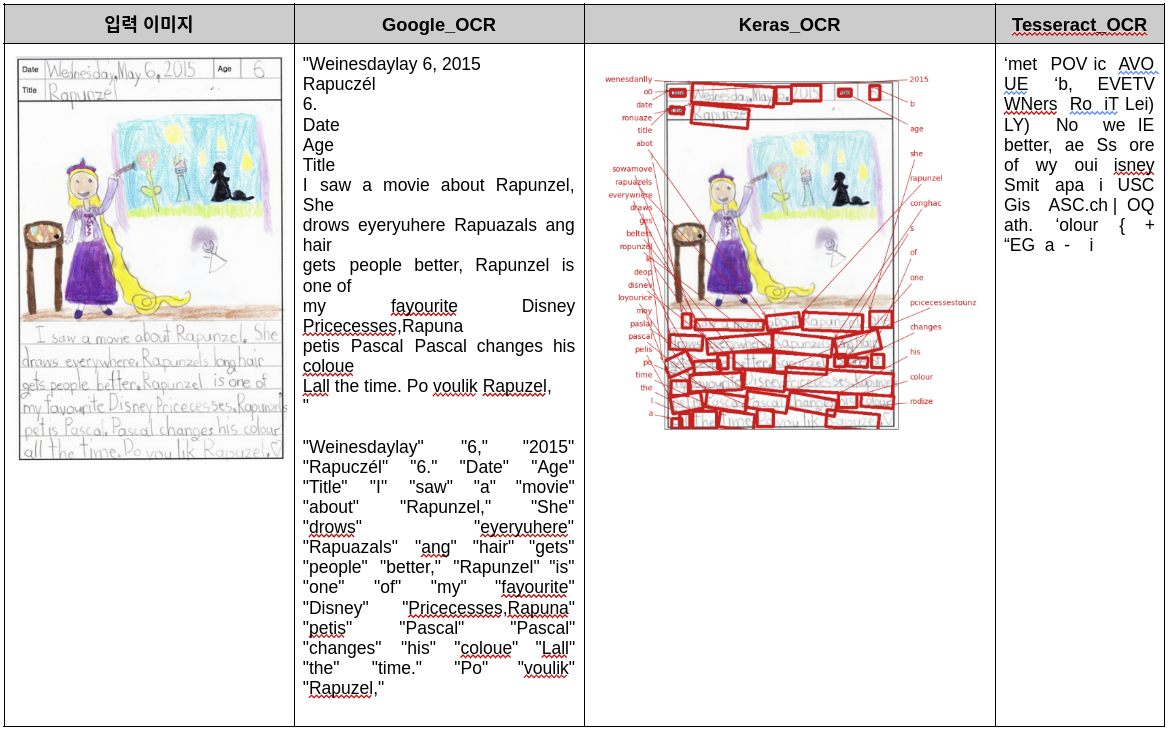

- **세번째 그림 일기**

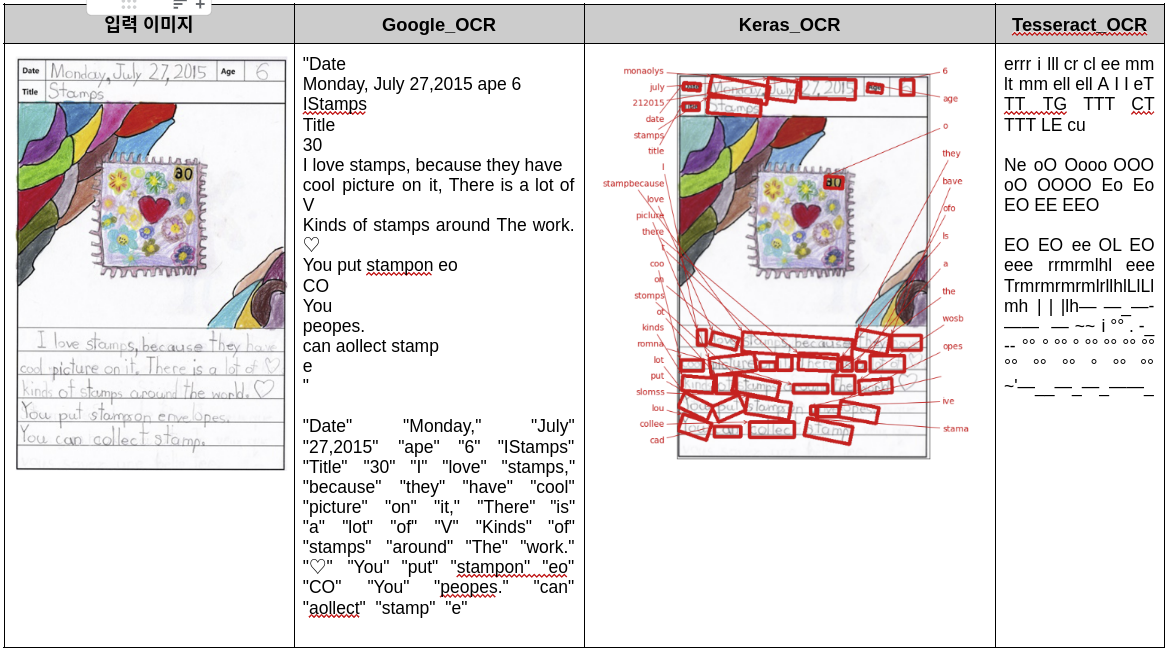

### ■ Step6 결과 분석과 결론 제시

**6-1 구현하고자 하는 서비스의 목적과 내용**

- 컴퓨터 글자체, 인쇄된 활자 등은 노드를 통해 어느정도 잘 인식되는 것을 확인했다. 그렇다면 사람의 글씨, 특히 어린이의 글씨는 얼마나 정확히 인식할 수 있을지 궁금했다.


- 어린이의 그림일기를 입력했을 때, 그 일기에 작성된 단어들을 인식하여 아이에 대한 데이터를 수집할 수 있다면 이를 통해 아이에 대한 깊은 이해(선호도, 감정 등)를 할 수 있고, 부모와 교사의 교육/상담/진로 등에 도움이 되는 서비스를 제시할 수 있을 것 같다.


- 따라서 모델간의 비교를 위해, 영어로 쓰인 어린이 그림 일기를 입력하여 OCR 인식 정도를 비교해보고자 한다.

**6-2 OCR 모델 평가 기준**

- **정량적 평가** : 몇개의 단어를 인식했는지 평가


- **정성적 평가** : 인식한 단어가 실제 단어와 일치하여 의미가 정확하지를 평가

**6-3 결과 분석 및 모델 선정**

- 평가 결과  정량적, 정성적 수준 모두 **Google_OCR > Keras_OCR > Tesseract** 순으로 높았다. 따라서 가장 적절한 모델은 **'Google_OCR'**이다.


- 먼저, Tesseract는 인식을 했다라고 평가하기도 애매할 정도로 성능이 좋지 않았다.


- Google_OCR과 Keras_OCR의 경우 정량적으로 인식한 단어의 개수는 거의 비슷했다. 그림일기의 그림 속 글씨들도 잘 인식했다.


- 하지만 정성적은 평가에서는 Google_OCR의 성능이 조금 더 좋았다. 예를 들어 첫번째 그림 일기의 첫 문장은 'I saw a rabbit.'인데, Google_OCR은 "I"  "saw"  "a"  "nabbit."으로 인식하였고, Keras_OCR은 "sawea", "rabbit"으로 인식하였다. Google_OCR은 rabbit의 r을 n으로 인식한 것을 빼고는 완벽히 인식 했고, Keras_OCR은 I를 인식 못하고, saw와 a의 띄어쓰기를 인식하지 못하고 한 단어로 인식하였다. 다른 단어들의 의미가 구분되게 정확힌 인식한 경우는 Google_OCR이 더 많았다.


- 다만, 손글씨 특성상 OCR이 정확히 인식하기 어려운 부분도 있는 것 같다.

### ■ 정리 및 회고

- 영수증 인식, 신용카드 인식, 명함 인식 등을 어플을 통해 해본적이 있어, OCR에 대해 궁금했었는데 이번 노드를 통해 구현까지 해보니 흥미로운 시간이었다.


- 사람 손글씨를 보다 더 정확히 인식하는 고도화된 OCR은 없는지, 없다면 어떻게 성능을 높일 수 있을지 궁금해졌다.


- 사진 인식과 문자 인식(OCR)을 동시에 인식하는 모델은 없는지 궁금하다. 그렇다면 그림일기와 같은 입력 데이터를 보다 더 정확히 파악할 수 있을 것 같다.